# Consider the car_price prediction problem:
1.Perform EDA.
2.Apply all the regression techniques that you have read till date.
3.Build best model among them and apply hyperparameter tuning on all algo using gridsearchCV algo.

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [387]:
file=pd.read_csv('CarPrice.csv')

In [388]:
file

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='price', ylabel='Count'>

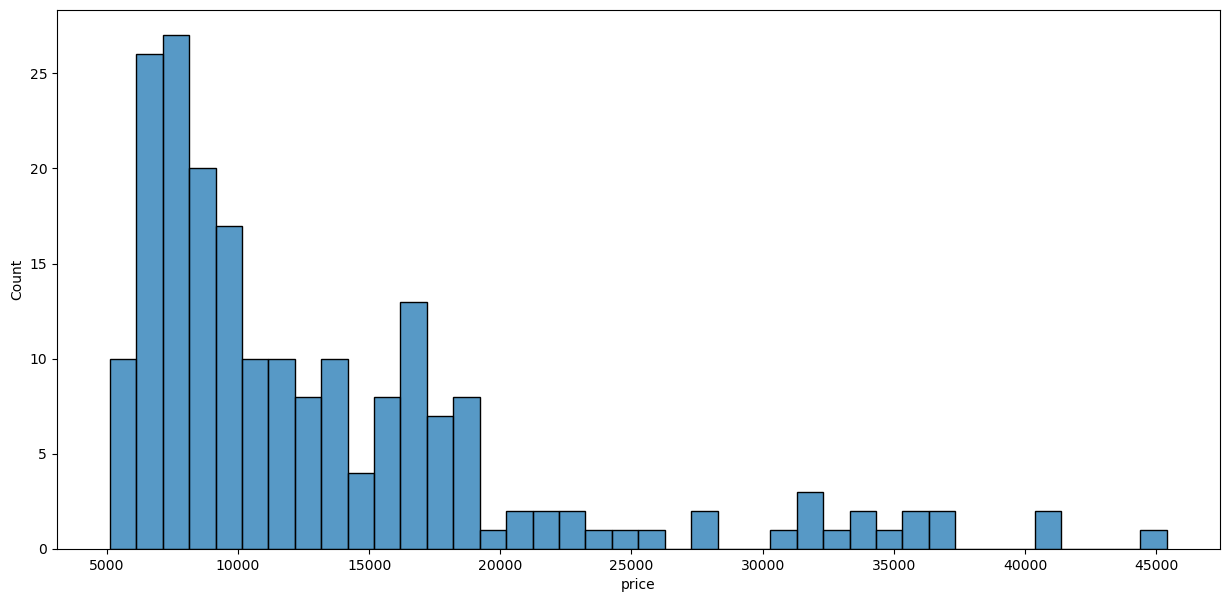

In [389]:
plt.figure(figsize=(15,7))
sns.histplot(file.price,bins=40)

In [390]:
file.columns.unique()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [391]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [392]:
file.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [393]:
file.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [394]:
file.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [395]:
file.shape

(205, 26)

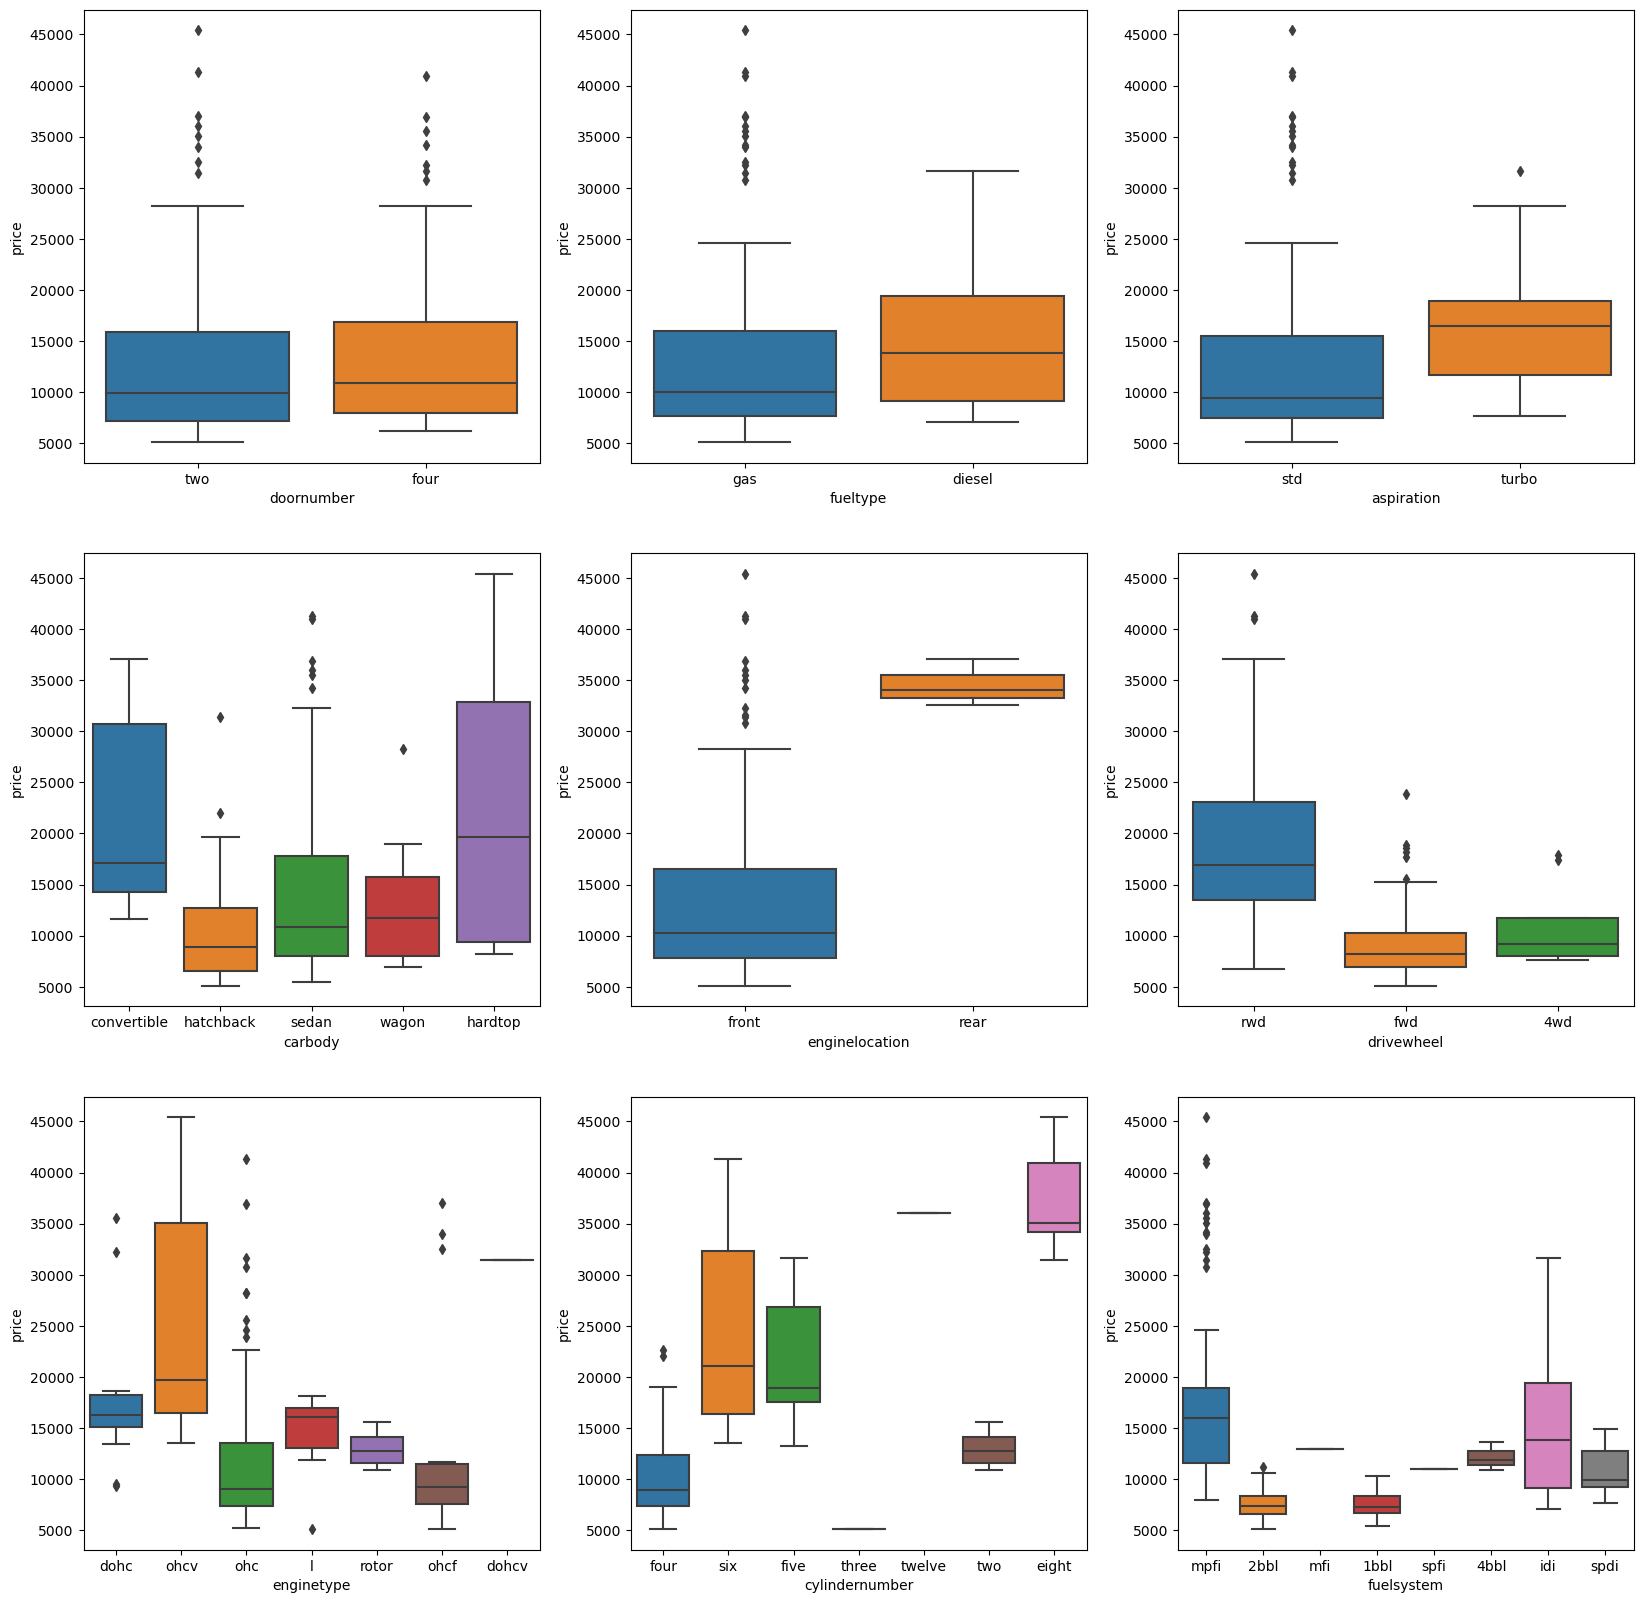

In [396]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = file)
plt.show()

In [397]:
#lets make the car name as a company name so that will be benifical for our data frame:

In [398]:
#spliting company name from car name
Companyname=file['CarName'].apply(lambda x:x.split(' ')[0])

In [399]:
Companyname

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [400]:
file.insert(3,'CompanyName',Companyname)

In [401]:
file.drop(['CarName'],axis=1,inplace=True)

In [402]:
file

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# now there are some names here which are simmilar but there are spelling mistakes so we will correct taht

In [403]:
file.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [404]:
file.CompanyName=file.CompanyName.str.lower()

In [405]:
file.CompanyName# tthese are converted into lower now

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

In [406]:
file.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [407]:
def replace_function(a,b):
    file.CompanyName.replace(a,b,inplace=True)
replace_function('maxda','mazda')
replace_function('alfa-romero','alfa-romeo')
replace_function('toyouta','toyota')
replace_function('vokswagen','volkswagen')
replace_function('vw','volkswagen')
replace_function('porcshce','porsche')

In [408]:
file

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [409]:
file.CompanyName.unique

<bound method Series.unique of 0      alfa-romeo
1      alfa-romeo
2      alfa-romeo
3            audi
4            audi
          ...    
200         volvo
201         volvo
202         volvo
203         volvo
204         volvo
Name: CompanyName, Length: 205, dtype: object>

In [410]:
file['fueleconomy'] = (0.55 * file['citympg']) + (0.45 * file['highwaympg'])

In [411]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [412]:
file.shape

(205, 27)

In [413]:
file['price'] = file['price'].astype('int')
temp = file.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
file_bin=['Budget','Medium','Highend']
file['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=file_bin)
file

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Medium


In [414]:
cor=file.corr()

In [415]:
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [416]:
cor.shape

(17, 17)

In [417]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.874587475964264 -- 3 -- 2 -- carlength -- wheelbase
0.8411182684818453 -- 4 -- 3 -- carwidth -- carlength
0.8777284608306433 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 6 -- 4 -- curbweight -- carwidth
0.850594073426277 -- 7 -- 6 -- enginesize -- curbweight
0.8097686545377302 -- 11 -- 7 -- horsepower -- enginesize
0.8014561756662708 -- 13 -- 11 -- citympg -- horsepower
0.9713370423425045 -- 14 -- 13 -- highwaympg -- citympg
0.835305437204371 -- 15 -- 6 -- price -- curbweight
0.8741451426986426 -- 15 -- 7 -- price -- enginesize
0.8081381197889799 -- 15 -- 11 -- price -- horsepower
0.9938444201653043 -- 16 -- 13 -- fueleconomy -- citympg
0.9916921560568324 -- 16 -- 14 -- fueleconomy -- highwaympg


In [418]:
print(cor.columns)
print('***************here are the columns which are corelated or having corelation>0.8***********************')
print(correlated_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
***************here are the columns which are corelated or having corelation>0.8***********************
{'carlength', 'fueleconomy', 'curbweight', 'horsepower', 'carwidth', 'price', 'wheelbase', 'enginesize', 'citympg', 'highwaympg'}


In [419]:
cor['highwaympg']['citympg']

0.9713370423425045

In [420]:
co_matrix = file[correlated_features].corr()
co_matrix

,carlength,fueleconomy,curbweight,horsepower,carwidth,price,wheelbase,enginesize,citympg,highwaympg
carlength,1.000000,-0.691472,0.877728,0.552623,0.841118,0.682921,0.874587,0.683360,-0.670909,-0.704662
fueleconomy,-0.691472,1.000000,-0.781535,-0.792822,-0.663419,-0.696214,-0.508136,-0.669464,0.993844,0.991692
curbweight,0.877728,-0.781535,1.000000,0.750739,0.867032,0.835305,0.776386,0.850594,-0.757414,-0.797465
horsepower,0.552623,-0.792822,0.750739,1.000000,0.640732,0.808138,0.353294,0.809769,-0.801456,-0.770544
carwidth,0.841118,-0.663419,0.867032,0.640732,1.000000,0.759325,0.795144,0.735433,-0.642704,-0.677218
price,0.682921,-0.696214,0.835305,0.808138,0.759325,1.000000,0.577816,0.874145,-0.685752,-0.697600
wheelbase,0.874587,-0.508136,0.776386,0.353294,0.795144,0.577816,1.000000,0.569329,-0.470414,-0.544082
enginesize,0.683360,-0.669464,0.850594,0.809769,0.735433,0.874145,0.569329,1.000000,-0.653658,-0.677470
citympg,-0.670909,0.993844,-0.757414,-0.801456,-0.642704,-0.685752,-0.470414,-0.653658,1.000000,0.971337
highwaympg,-0.704662,0.991692,-0.797465,-0.770544,-0.677218,-0.697600,-0.544082,-0.677470,0.971337,1.000000


<AxesSubplot:>

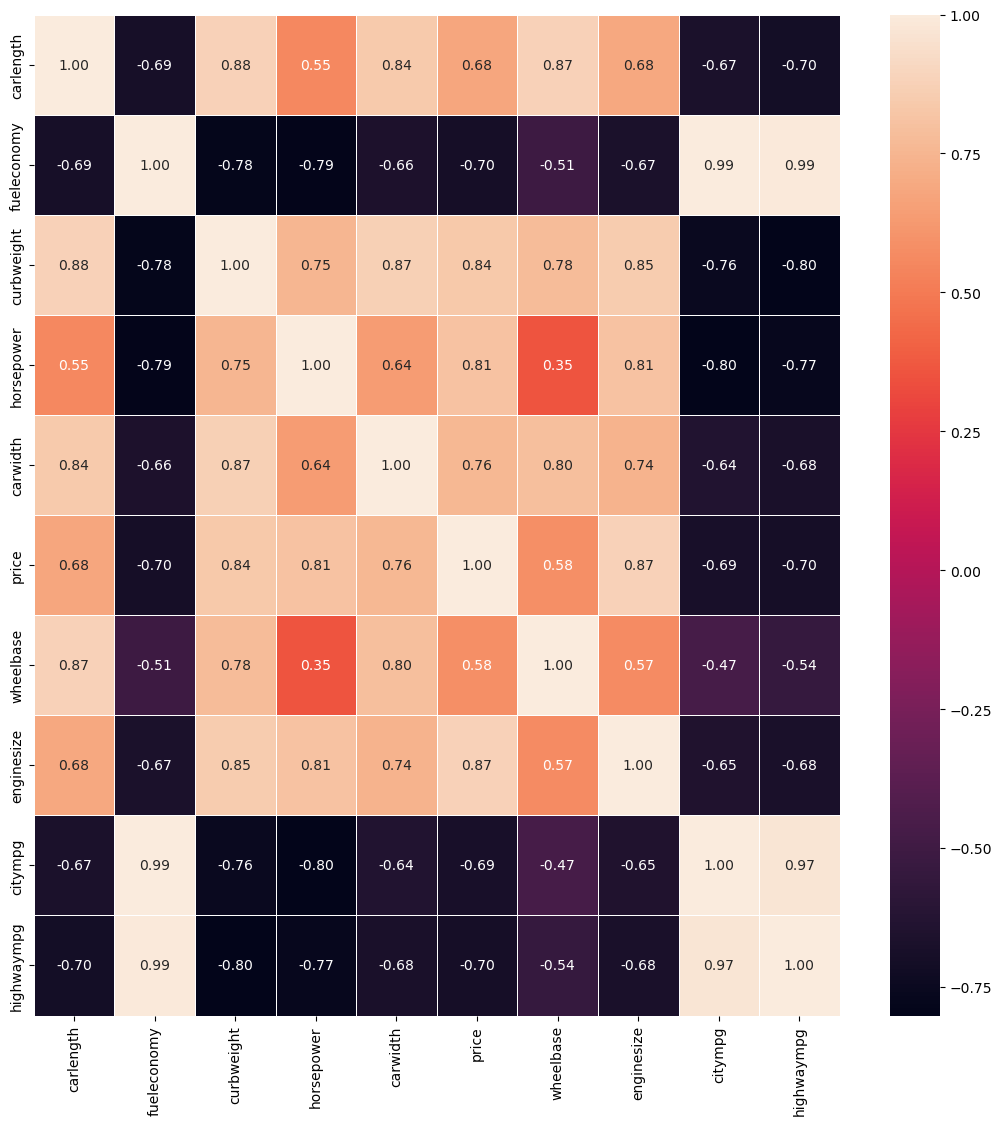

In [421]:
plt.figure(figsize=(13,13))
sns.heatmap(co_matrix,annot=True, linewidths=.5, fmt=".2f")

# from corelation matrix i came to know that which columns have high relation
so i will use that columns in my dataframe

In [422]:
file.shape

(205, 28)

In [423]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

cars_lr = file
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('CompanyName',cars_lr)
cars_lr = dummies('doornumber',cars_lr)
cars_lr = dummies('enginelocation',cars_lr)
cars_lr = dummies('fuelsystem',cars_lr)
    

In [424]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int32  
 16  fueleconomy       205 non-null    float64
 1

In [425]:
cars_lr['car_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [426]:
s=cars_lr.drop(['car_ID'],axis=1)

In [427]:
s

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


In [428]:
x=s.drop(['price'],axis=1)

In [429]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


In [430]:
y=s['price']

In [431]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [477]:
col=['wheelbase','carwidth']

# before performing the algo i need to remove multicolinearity:
# so i will use VIF and ols method:
#i will prefer here only one method and that is


In [432]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [433]:
# we use ols method to find multicollinerity and we can fid it by checting coff and p vaue and the standarf error abd corr matrix
def ols_function(x,y):
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(lm.summary())
    return lm

In [434]:
#this method also hep us to remove the multicollinerity
def vif_function(x):
    vif=pd.DataFrame
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape())]
    vif['VIF']=round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

# so here i can see some of columns have high p values so i need to change it


In [435]:
model1=ols_function(x,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     68.86
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           6.09e-82
Time:                        18:14:27   Log-Likelihood:                -1784.9
No. Observations:                 205   AIC:                             3692.
Df Residuals:                     144   BIC:                             3895.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.96e+04   9804.032  

# so from model one there are some higher values of p:
#lest remove that columns

In [436]:
x.drop(['symboling','carheight','boreratio','stroke','compressionratio','horsepower'], axis=1,inplace=True)

In [437]:
x.drop(['fueleconomy'],axis=1,inplace=True)

In [438]:
x.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'Medium', 'Highend', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'two', 'rear', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [439]:
x.drop(['fwd','rwd','dohcv','rotor', 'five', 'four', 'six', 'three', 'twelve','Medium','audi','honda', 'isuzu', 'jaguar','mazda', 'mercury'],axis=1,inplace=True)

In [440]:
x

,wheelbase,carlength,carwidth,curbweight,enginesize,peakrpm,citympg,highwaympg,gas,turbo,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,2548,130,5000,21,27,1,0,...,0,1,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,5000,21,27,1,0,...,0,1,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,5000,19,26,1,0,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,5500,24,30,1,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,5500,18,22,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,5400,23,28,1,0,...,1,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,3049,141,5300,19,25,1,1,...,1,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,3012,173,5500,18,23,1,0,...,1,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,3217,145,4800,26,27,0,1,...,1,0,0,0,0,1,0,0,0,0


In [441]:
x.drop(['porsche', 'renault', 'saab','toyota', 'volkswagen', 'volvo', 'two','2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],axis=1,inplace=True)

In [442]:
x

,wheelbase,carlength,carwidth,curbweight,enginesize,peakrpm,citympg,highwaympg,gas,turbo,...,bmw,buick,chevrolet,dodge,mitsubishi,nissan,peugeot,plymouth,subaru,rear
0,88.6,168.8,64.1,2548,130,5000,21,27,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,5000,21,27,1,0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,5000,19,26,1,0,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,109,5500,24,30,1,0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,136,5500,18,22,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,5400,23,28,1,0,...,0,0,0,0,0,0,0,0,0,0
201,109.1,188.8,68.8,3049,141,5300,19,25,1,1,...,0,0,0,0,0,0,0,0,0,0
202,109.1,188.8,68.9,3012,173,5500,18,23,1,0,...,0,0,0,0,0,0,0,0,0,0
203,109.1,188.8,68.9,3217,145,4800,26,27,0,1,...,0,0,0,0,0,0,0,0,0,0


In [443]:
model2=ols_function(x,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     108.9
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.72e-96
Time:                        18:14:28   Log-Likelihood:                -1834.3
No. Observations:                 205   AIC:                             3727.
Df Residuals:                     176   BIC:                             3823.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.983e+04   9856.655     -7.085      0.0

In [444]:
x.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'l', 'ohc', 'ohcf', 'ohcv', 'Highend',
       'bmw', 'buick', 'chevrolet', 'dodge', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'subaru', 'rear'],
      dtype='object')

In [445]:
x.drop(['carlength','citympg','highwaympg', 'gas','l','ohcv','buick', 'chevrolet', 'dodge','nissan','plymouth'],axis=1,inplace=True)

In [446]:
x

,wheelbase,carwidth,curbweight,enginesize,peakrpm,turbo,hardtop,hatchback,sedan,wagon,ohc,ohcf,Highend,bmw,mitsubishi,peugeot,subaru,rear
0,88.6,64.1,2548,130,5000,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,64.1,2548,130,5000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,65.5,2823,152,5000,0,0,1,0,0,0,0,0,0,0,0,0,0
3,99.8,66.2,2337,109,5500,0,0,0,1,0,1,0,0,0,0,0,0,0
4,99.4,66.4,2824,136,5500,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,68.9,2952,141,5400,0,0,0,1,0,1,0,0,0,0,0,0,0
201,109.1,68.8,3049,141,5300,1,0,0,1,0,1,0,0,0,0,0,0,0
202,109.1,68.9,3012,173,5500,0,0,0,1,0,0,0,0,0,0,0,0,0
203,109.1,68.9,3217,145,4800,1,0,0,1,0,1,0,0,0,0,0,0,0


In [447]:
model3=ols_function(x,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     177.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.96e-105
Time:                        18:14:28   Log-Likelihood:                -1841.4
No. Observations:                 205   AIC:                             3719.
Df Residuals:                     187   BIC:                             3779.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.12e+04   8375.243     -8.501      0.0

In [448]:
#so here i remove all the values now lets split the data

In [449]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [450]:
#scaling
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [451]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [452]:
y_pred= model.predict(x_test)
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
131,9895,10291.127038
117,18150,14501.547934
63,10795,9500.144344
56,11845,9008.258784
49,36000,33842.778770


In [453]:
y_test

131     9895
117    18150
63     10795
56     11845
49     36000
       ...  
190     9980
204    22625
72     35056
130     9295
24      6229
Name: price, Length: 62, dtype: int32

In [454]:
model.score(x_test,y_test)

0.8905103881181942

# always remenber this x_test score automattically connected the value of pricted one then it compare the valu with y_test.

In [455]:
np.reshape(-1, 1),y_pred

(array([-1]),
 array([10291.12703818, 14501.54793402,  9500.14434376,  9008.25878357,
        33842.77876955,  9603.45623978,  4797.11939792, 10683.05632535,
         5626.73473194, 16675.18820426, 11342.41766012,  8905.72602581,
         6338.55531716, 14872.38002191, 28449.14092314, 16139.92118724,
         9399.0653942 , 13850.26817744, 12485.06025448, 12440.25759363,
         6636.00371175, 21307.5684797 , 11720.55487248, 16330.62394047,
        16571.86989674, 14519.33605428,  8552.57808332,  5028.7856689 ,
         8893.47640374, 16541.58519271,  5426.87416075,  5340.63876989,
         4740.50129778,  9790.3594788 , 27811.23595567, 26092.36574813,
         9266.07437963, 16044.45719834,  7186.54410812,  2848.88483092,
         9145.74976932,  5821.95929065,  6935.19201881, 30060.48265101,
        30929.70112807,  5263.04676344, 10617.18121881, 14722.36518222,
         6626.66604249, 13153.09620683,  9501.56495227, 13783.63913566,
        16725.32753109,  5457.28329042,  9008.2587

In [456]:
np.reshape(-1, 1),y_test

(array([-1]),
 131     9895
 117    18150
 63     10795
 56     11845
 49     36000
        ...  
 190     9980
 204    22625
 72     35056
 130     9295
 24      6229
 Name: price, Length: 62, dtype: int32)

In [457]:
# always remenber this x_train score automattically connected the value of pricted one then it compare the valu with y_train.

In [458]:
model.score(x_train,y_train)

0.9429192671739486

In [459]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [460]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 2206.35724839022
 RMSE: 6950342.3238096135


In [461]:
s=pd.DataFrame(y_test)

In [462]:
import statsmodels.api as sm
x=sm.add_constant(x)

In [463]:
model=sm.OLS(y,x).fit()

In [464]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     177.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.96e-105
Time:                        18:14:28   Log-Likelihood:                -1841.4
No. Observations:                 205   AIC:                             3719.
Df Residuals:                     187   BIC:                             3779.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.12e+04   8375.243     -8.501      0.000   -8.77e+04   -5.47e+04
wheelbase    123.5773     56.329      2.194      0.029      12.455     234.700
carwidth     843.7113    161.785      5.215      0.000     524.552    1162.870
curbweight     3.2871      0.981      3.352      0.001       1.352       5.222
enginesize    38.3043      9.507      4.029      0.000      19.549      57.060
peakrpm        1.4669      0.375      3.909      0.000       0.727       2.207
turbo       1455.1876    455.721      3.193      0.002     556.172    2354.203
hardtop    -3594.7521   1159.356     -3.101      0.002   -5881.850   -1307.654
hatchback  -4150.1237    953.146     -4.354      0.000   -6030.425   -2269.822
sedan      -3970.7188    980.389     -4.050      0.000   -5904.763   -2036.675
wagon      -5073.4841   1053.823     -4.814      0.000   -7152.394   -2994.574
ohc        -1448.0817    548.957     -2.638      0.009   -2531.027    -365.136
ohcf        2869.7077    596.598      4.810      0.000    1692.780    4046.635
Highend     6899.3914    844.504      8.170      0.000    5233.413    8565.370
bmw         3547.7499   1053.529      3.367      0.001    1469.421    5626.079
mitsubishi -1618.1803    624.896     -2.590      0.010   -2850.933    -385.428
peugeot    -3690.8978    951.485     -3.879      0.000   -5567.922   -1813.874
subaru     -4391.4765    770.930     -5.696      0.000   -5912.314   -2870.639
rear        7261.1842   1085.844      6.687      0.000    5119.107    9403.262
==============================================================================
Omnibus:                       60.825   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.738
Skew:                           1.090   Prob(JB):                     1.08e-56
Kurtosis:                       8.042   Cond. No.                     1.34e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [465]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [466]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [467]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [468]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [469]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 0.7477601508915402
	Mean absolute error: 3092.470967741936
	R2 score: 0.6667574280492115

GradientBoostingRegressor()
	Training time: 0.029s
	Prediction time: 0.000s
	Explained variance: 0.8507697392744034
	Mean absolute error: 2208.114871854668
	R2 score: 0.8336182038300695

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.001s
	Explained variance: 0.7477601508915402
	Mean absolute error: 3092.470967741936
	R2 score: 0.6667574280492115

ExtraTreesRegressor()
	Training time: 0.098s
	Prediction time: 0.006s
	Explained variance: 0.9240590156600926
	Mean absolute error: 1798.7887903225808
	R2 score: 0.9039635844670493

RandomForestRegressor()
	Training time: 0.106s
	Prediction time: 0.005s
	Explained variance: 0.8271066613032501
	Mean absolute error: 2307.4339516129035
	R2 score: 0.7954682843135931

DecisionTreeRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained va

In [470]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#so in case of regression the parameters that we select are:

In [471]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [472]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(x,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mse', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'log2'} 

GradientBoostingRegressor(criterion='mse', learning_rate=0.25, loss='lad',
                          max_features='log2') 



In [473]:
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'sqrt'} 

GradientBoostingRegressor(learning_rate=0.25, loss='lad', max_features='sqrt')

GradientBoostingRegressor(learning_rate=0.25, loss='lad', max_features='sqrt')

<AxesSubplot:xlabel='price', ylabel='Density'>

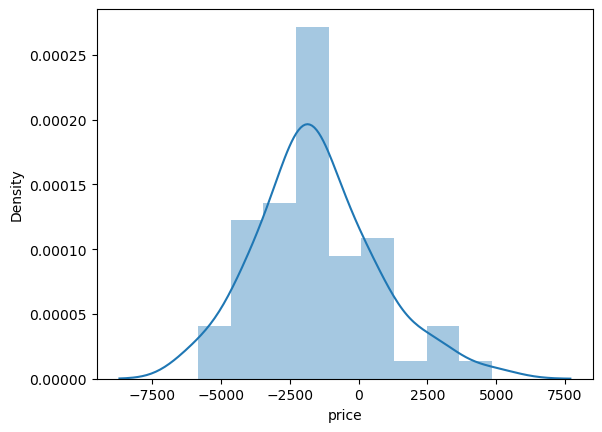

In [474]:
sns.distplot(y_pred-y_test)

In [475]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape

(144, 16)